In [2]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
j = I
init_printing()

In [3]:
# Define the symbols we will use
t,w = symbols('t omega', real=True)
s = symbols('s')

/tmp/ipykernel_264366/1218691827.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


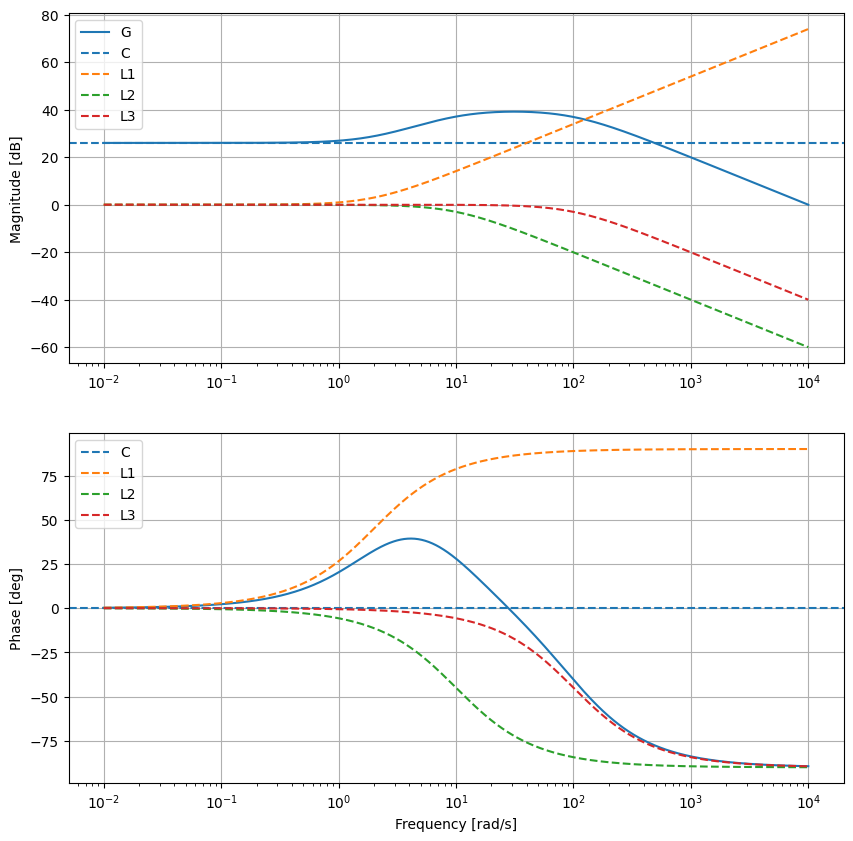

In [4]:
G = 10**4*(j*w+2)/(j*w+10)/(j*w+100)
C = 10**4*2/10/100
L1 = (j*w/2+1)**1
L2 = (j*w/10+1)**(-1)
L3 = (j*w/100+1)**(-1)

#Plot the Bode plot
fig, ax = plt.subplots(2,1, figsize=(10,10))
w_vals = np.logspace(-2,4,1000)
magG = lambdify(w, 20*log(abs(G),10), modules=['numpy'])
magC = lambdify(w, 20*log(abs(C),10), modules=['numpy'])
magL1 = lambdify(w, 20*log(abs(L1),10), modules=['numpy'])
magL2 = lambdify(w, 20*log(abs(L2),10), modules=['numpy'])
magL3 = lambdify(w, 20*log(abs(L3),10), modules=['numpy'])


ax[0].semilogx(w_vals, magG(w_vals),label = 'G')
ax[0].axhline(y=magC(w_vals),linestyle = '--', label = 'C')
ax[0].semilogx(w_vals, magL1(w_vals),linestyle = '--',label = 'L1')
ax[0].semilogx(w_vals, magL2(w_vals),linestyle = '--',label = 'L2')
ax[0].semilogx(w_vals, magL3(w_vals),linestyle = '--',label = 'L3')


ax[0].legend()
ax[0].set_ylabel('Magnitude [dB]')
ax[0].grid(True)

phaseG = lambdify(w, arg(G), modules=['numpy'])
phaseC = 0 if C >= 0 else -180
phaseL1 = lambdify(w, arg(L1), modules=['numpy'])
phaseL2 = lambdify(w, arg(L2), modules=['numpy'])
phaseL3 = lambdify(w, arg(L3), modules=['numpy'])


ax[1].semilogx(w_vals, np.rad2deg(phaseG(w_vals)))
ax[1].axhline((phaseC),linestyle='--',label='C')
ax[1].semilogx(w_vals, np.rad2deg(phaseL1(w_vals)),linestyle='--',label='L1')
ax[1].semilogx(w_vals, np.rad2deg(phaseL2(w_vals)),linestyle='--',label='L2')
ax[1].semilogx(w_vals, np.rad2deg(phaseL3(w_vals)),linestyle='--',label='L3')

ax[1].set_xlabel('Frequency [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].legend()
ax[1].grid(True)


fig.tight_layout
fig.show()


In [5]:
magC(w_vals)

/tmp/ipykernel_264366/1516948286.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


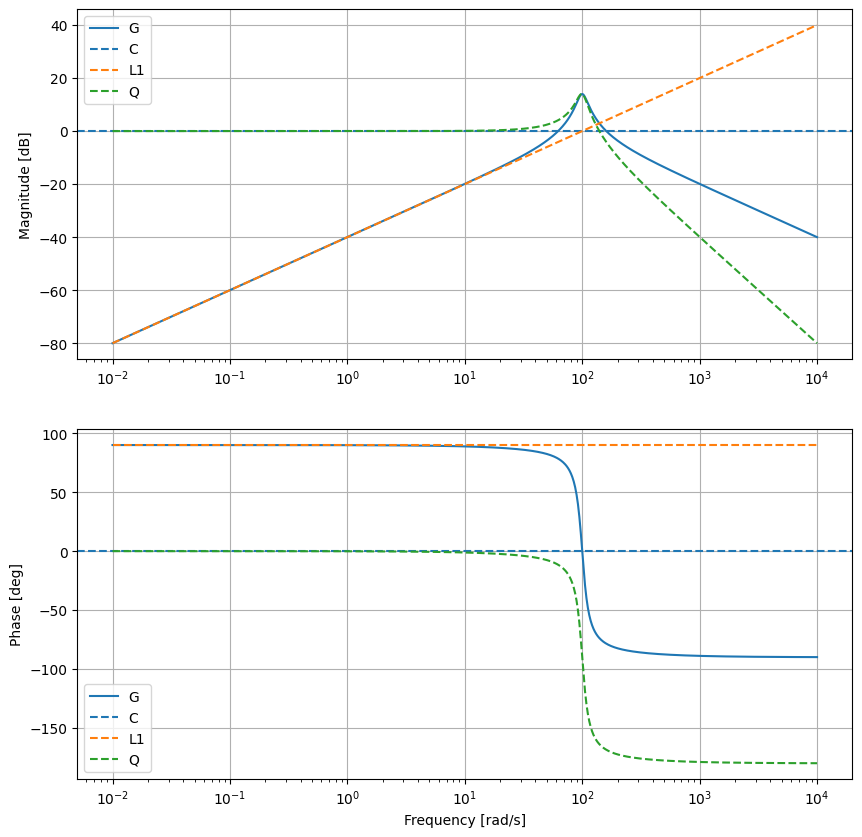

In [6]:
G = 100*s/(s**2+20*s+10000)
wn = 100
zeta = 20/2/wn
C = 100/wn
L1 = (j*w/100)**1
Q = ((j*w/wn)**2+2*j*zeta*w/wn+1)**(-1)

#Plot the Bode plot
fig, ax = plt.subplots(2,1, figsize=(10,10))
w_vals = np.logspace(-2,4,1000)
magG = lambdify(w, 20*log(abs(G.subs(s,j*w)),10), modules=['numpy'])
magC = lambdify(w, 20*log(abs(C),10), modules=['numpy'])
magL1 = lambdify(w, 20*log(abs(L1),10), modules=['numpy'])
magQ = lambdify(w, 20*log(abs(Q),10), modules=['numpy'])


ax[0].semilogx(w_vals, magG(w_vals),label = 'G')
ax[0].axhline(y=magC(w_vals),linestyle = '--', label = 'C')
ax[0].semilogx(w_vals, magL1(w_vals),linestyle = '--',label = 'L1')
ax[0].semilogx(w_vals, magQ(w_vals),linestyle = '--',label = 'Q')


ax[0].legend()
ax[0].set_ylabel('Magnitude [dB]')
ax[0].grid(True)

phaseG = lambdify(w, arg(G.subs(s,j*w)), modules=['numpy'])
phaseC = 0 if C >= 0 else -180
phaseL1 = lambdify(w, arg(L1), modules=['numpy'])
phaseQ = lambdify(w, arg(Q), modules=['numpy'])


ax[1].semilogx(w_vals, np.rad2deg(phaseG(w_vals)),label='G')
ax[1].axhline((phaseC),linestyle='--',label='C')
ax[1].semilogx(w_vals, np.rad2deg(phaseL1(w_vals)),linestyle='--',label='L1')
ax[1].semilogx(w_vals, np.rad2deg(phaseQ(w_vals)),linestyle='--',label='Q')

ax[1].set_xlabel('Frequency [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].legend()
ax[1].grid(True)


fig.tight_layout
fig.show()


/home/mort/Documents/Signaler/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mort/Documents/Signaler/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


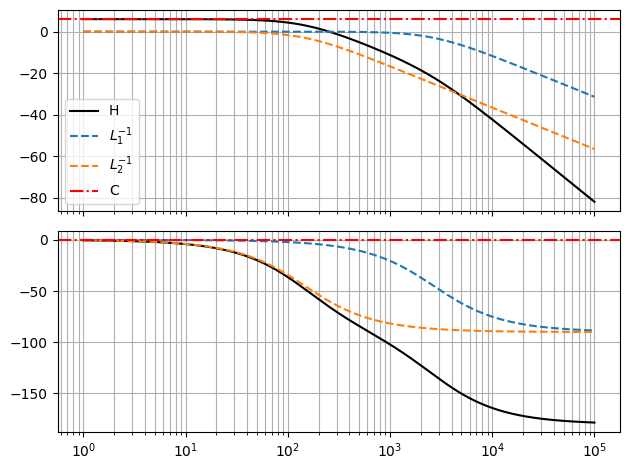

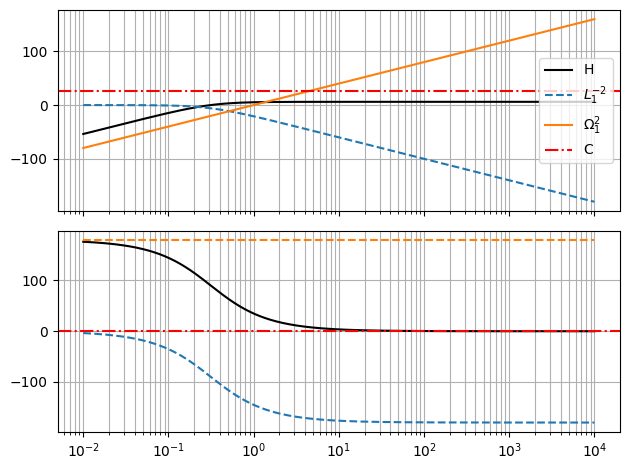

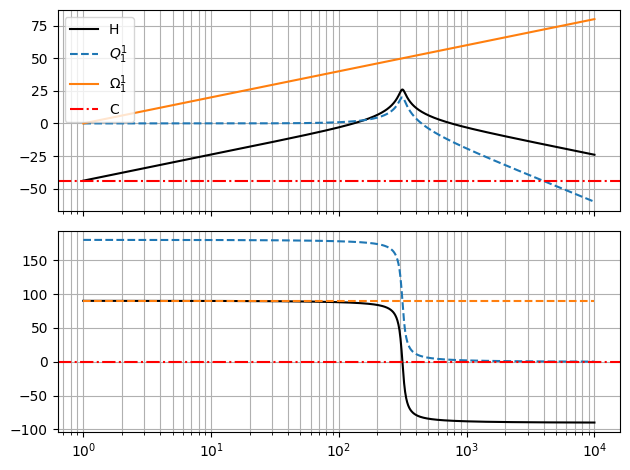

In [63]:
def gain(G):
    return 20*log(abs(G),10)

def phase(G):
    return 180./pi*arg(G)


def sallenKeyBode(b, a, plot_range = (-2,3)):
    j = I
    w = Symbol('omega',real=True)
    jw = j*w
    s = Symbol('s')
    num = sum([b[i]*s**(len(b)-i-1) for i in range(len(b))])
    poles = roots(num,s)
    numF = prod([(s-s0) ** poles[s0] for s0 in poles])
    numM = simplify((num/numF).subs(s,1))
    
    den = sum([a[i]*s**(len(a)-i-1) for i in range(len(a))])
    zero = roots(den,s)
    denF = prod([(s-s0) ** zero[s0] for s0 in zero])
    denM = simplify((den/denF).subs(s,1))
    
    
    K = numM/denM
    H = 1
    C = K
    
    Os = []
    Ls = []
    Qs = []
    
    for pole in poles:
        if pole == 0:
            H *=s**poles[pole]
            Os.append(s**poles[pole])
        elif pole.is_real:
            H *= (s/pole + 1)**poles[pole]
            C *= pole**poles[pole]
            Ls.append((-s/pole + 1)**poles[pole])
        else:
            if im(pole) > 0:
                Q = (s-pole)*(s-pole.conjugate())
                q0 = (Q.subs(s,0)).simplify()
                q1 = (Q.simplify()).coeff(s)
                H *= (s**2/q0+q1/q0*s+1)**poles[pole]
                C *= q0**poles[pole]
                Qs.append((s**2/q0+q1/q0*s+1)**poles[pole])
                
    for zer in zero:
        if zer == 0:
            H /= s
            Os.append(s**(-zero[zer]))
        elif zer.is_real:
            H /= (-s/zer + 1)**zero[zer]
            C /= zer**zero[zer]
            Ls.append((-s/zer + 1)**(-zero[zer]))
        else:
            if im(zer) > 0:
                Q = (s-zer)*(s-zer.conjugate())
                q0 = (Q.subs(s,0)).simplify()
                q1 = (Q.simplify()).coeff(s)
                H /= (s**2/q0+q1/q0*s+1)**zero[zer]
                C /= q0**zero[zer]
                Qs.append(-((s**2/q0+q1/q0*s+1)**(-zero[zer])))
                
    H *= C
    
    fig, ax = plt.subplots(2,1,sharex=True);
    w0 = np.logspace(*plot_range,1000);
    ax[0].semilogx(w0,lambdify(w,gain(H.subs(s,jw)))(w0),color='black',label='H');
    ax[1].semilogx(w0,lambdify(w,phase(H.subs(s,jw)))(w0),color='black',label='H');
    for L in Ls:
        Lw = L.subs(s,jw)
        gainL = lambdify(w,gain(Lw))
        phaseL = lambdify(w,phase(Lw))
        ax[0].semilogx(w0,gainL(w0),label=r'$L_{{{index}}}^{{{power}}}$'.format(index=Ls.index(L)+1,power=Lw.as_base_exp()[1]),linestyle='--');
        ax[1].semilogx(w0,phaseL(w0),linestyle='--');

    for Q in Qs:
        Qw = Q.subs(s,jw)
        gainQ = lambdify(w,gain(Qw))
        phaseQ = lambdify(w,phase(Qw))
        ax[0].semilogx(w0,gainQ(w0),label=r'$Q_{{{index}}}^{{{power}}}$'.format(index=Qs.index(Q)+1,power=Q.as_base_exp()[1]),linestyle='--');
        ax[1].semilogx(w0,phaseQ(w0),linestyle='--');
        
    for O in Os:
        Ow = O.subs(s,jw)
        gainO = lambdify(w,gain(Ow))
        phaseO = lambdify(w,phase(Ow))
        ax[0].semilogx(w0,gainO(w0),label=r'$\Omega_{{{index}}}^{{{power}}}$'.format(index=Os.index(O)+1,power=O.as_base_exp()[1],linestyle='--'));
        ax[1].semilogx(w0,phaseO(w0),linestyle='--');
        
    ax[0].axhline(gain(C),color='red',linestyle='-.',label = 'C');
    ax[1].axhline(phase(C),color='red',linestyle='-.');
    ax[0].grid(True,which='both');
    ax[1].grid(True,which='both');
    ax[0].legend();
    fig.tight_layout();
    return


sallenKeyBode([789629],[1,2827.53,394815],plot_range=(0,5));
sallenKeyBode([2,0,0],[1,pi/5,pi**2/100],plot_range=(-2,4));
sallenKeyBode([628.3,0],[1,31.41,98695],plot_range=(0,4))

In [ ]:
sallenKeyBode([])